<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/PCA%26Numpy%26Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Make data

In [0]:
#make data
X, y = make_regression(n_samples=100, n_features=5, n_informative=5, tail_strength=.5, effective_rank=True, random_state=13)
df = pd.DataFrame(X)

In [44]:
#correlation
df.corr()

,0,1,2,3,4
0,1.000000,0.408255,0.598803,-0.596714,0.201505
1,0.408255,1.000000,0.432351,-0.502208,-0.105907
2,0.598803,0.432351,1.000000,-0.693850,-0.044258
3,-0.596714,-0.502208,-0.693850,1.000000,0.014930
4,0.201505,-0.105907,-0.044258,0.014930,1.000000


### Make model

**Сформируем ковариационную матрицу**

Таким образом, в нашей матрице по диагонали будут дисперсии признаков, а в остальных ячейках – ковариации соответствующих пар признаков(**иными словами зависимости одних признаков от других**). 

In [0]:
cov_matrix = np.cov(df.values.T)

**Eigen Vector and Eigenvalues**

Собственный вектор и собственные значения

Собственные векторы (главные компоненты) определяют направления нового пространства признаков, а собственные значения определяют их величину. Другими словами, собственные значения объясняют дисперсию данных вдоль новых осей признаков. Собственный вектор матрицы A представляет собой вектор, представленный матрицей X, так что, когда X умножается на матрицу A, направление результирующей матрицы остается таким же, как вектор X.


#### Calc evalues, evector and Find percent

In [47]:
val_vec, vec = np.linalg.eig(cov_matrix)
vec[0]

array([-0.39829323, -0.23148818,  0.8312332 , -0.3107041 ,  0.01703118])

In [0]:
#make pairs
eig_pairs = [(np.abs(val_vec[i]), vec[:,i]) for i in range(len(val_vec))]
#sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(0.01003804918508908,
  array([-0.39829323, -0.32275019, -0.58448057,  0.62894889, -0.00075963])),
 (0.004034321911920788,
  array([-0.23148818,  0.13695785,  0.05463838, -0.02669868, -0.96122713])),
 (0.0017617093449756494,
  array([ 0.01703118,  0.85960976, -0.50241183, -0.01488004,  0.09023268])),
 (0.0013711268115077532,
  array([-0.3107041 , -0.28367541, -0.46760292, -0.77683597,  0.02940427])),
 (0.0011234436626234984,
  array([ 0.8312332 , -0.24015448, -0.42933318,  0.00386529, -0.25891172]))]

In [52]:
total = sum(val_vec)
var_exp = [(i / total)*100 for i in sorted(val_vec, reverse=True)]
var_exp #sum return 100

[54.76698329314795,
 22.011013960516447,
 9.611778592097803,
 7.4807841438132945,
 6.129440010424504]

#### PCA

In [0]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [5]:
pca.components_

array([[-0.39829323, -0.32275019, -0.58448057,  0.62894889, -0.00075963]])

In [6]:
pca.explained_variance_ratio_

array([0.54766983])

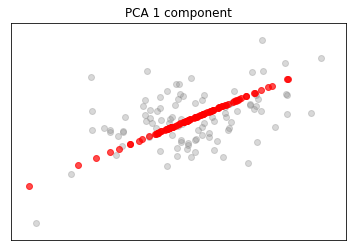

In [10]:
pca_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, color = 'gray')
plt.scatter(pca_new[:, 0], pca_new[:, 1], alpha=0.7, color = 'red')
plt.title('PCA 1 component')
plt.yticks(())
plt.xticks(());

#### Calc and plot vector

In [0]:
e_value_3sigma = 3 * np.sqrt(pca.explained_variance_[0]) 
e_value_3sigma_arr = np.array([[-e_value_3sigma, e_value_3sigma]])
e_vector = np.array([pca.components_[0]]).T
e = np.dot(e_vector, e_value_3sigma_arr)

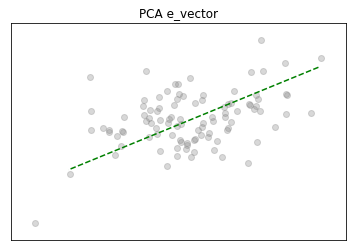

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, color = 'gray')
plt.plot(e[0], e[1], 'g--')
plt.title('PCA e_vector')
plt.yticks(())
plt.xticks(());

### Add iris data

In [0]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

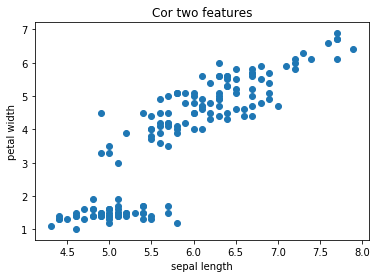

In [64]:
plt.scatter(X[:, 0], X[:,2])
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('Cor two features');

In [0]:
data = load_iris()
df = pd.DataFrame(X, columns=data.feature_names)

In [0]:
df.drop(labels=['sepal width (cm)', 'petal width (cm)'], axis = 1, inplace=True)

In [67]:
pca = PCA(n_components = 1)
p1 = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.9631579])

Преобразованные данные были сведены к одному измерению. Чтобы понять эффект такого уменьшения размерности, мы можем выполнить обратное преобразование этих сокращенных данных и построить их вместе с исходными данными

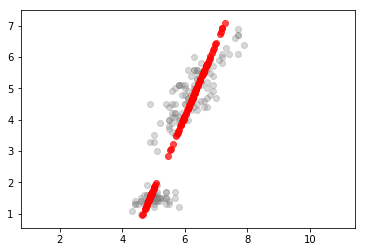

In [68]:
p1_new = pca.inverse_transform(p1)
plt.scatter(X[:, 0], X[:, 2], alpha=0.3, color = 'gray')
plt.scatter(p1_new[:, 0], p1_new[:, 1], alpha=0.7, color = 'red')
plt.axis('equal');

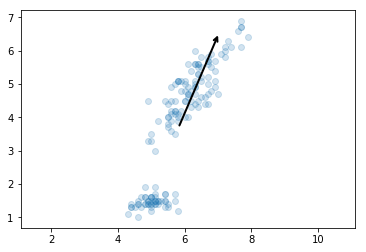

In [69]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:,0], X[:,2], alpha=0.2)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Add gen data, cal PCA by numpy

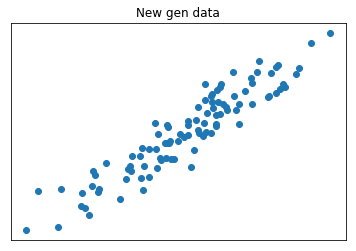

In [170]:
# Make new data
x = np.random.normal(scale =5, size = 100)
y = x*2 + np.random.normal(scale =3, size = 100)
plt.scatter(x, y)
plt.title('New gen data')
plt.yticks(())
plt.xticks(());

In [0]:
#centred data
x = x - np.mean(x)
y = y - np.mean(y)
X = np.vstack((x, y))

Если два векторных элемента изменяются вместе, они будут иметь более высокую ковариацию. Если изменение одного элемента полностью не зависит от другого, их ковариация стремится к нулю.

In [172]:
#cov
cov = np.cov(X)
cov

array([[19.64182052, 38.88045485],
       [38.88045485, 88.25166998]])

In [173]:
# Variance check
np.var(X[0]), np.var(X[1])
print('Variance X:', cov[0,0], 'Variance Y:', cov[1,1])
print('The variance is greatest in the Y axis.')

Variance X: 19.641820516275125 Variance Y: 88.25166997813486
The variance is greatest in the Y axis.


In [191]:
e_val, vec = np.linalg.eig(cov)
vec

array([[-0.9114842 , -0.41133508],
       [ 0.41133508, -0.9114842 ]])

In [0]:
def variance_ratio(e_val):
  # calc ratio
  total = sum(e_val)
  var_exp = [(i / total) for i in e_val]
  return var_exp 

In [0]:
#ratio
ratio = variance_ratio(e_val)

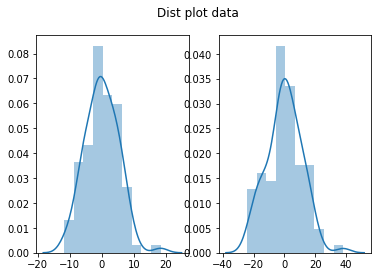

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(X[0], ax = ax1)
sns.distplot(X[1], ax = ax2)
plt.suptitle('Dist plot data');

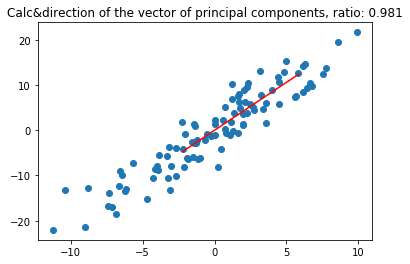

In [203]:
X_new = np.dot(vec[0], X)
var = [cov[0,0], cov[1,1]]
sigma = np.sqrt(var)
sigma = np.array([-sigma, sigma])
ev = np.dot(vec.T, sigma)
plt.scatter(X[0], X[1])
plt.plot(ev[:, 0], ev[:, 1], color = 'r')
plt.title('Calc&direction of the vector of principal components, ratio: ' + str(np.round(ratio[1], decimals=3)));

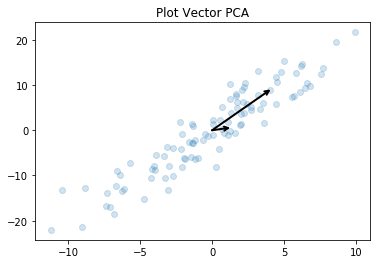

In [200]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[0], X[1], alpha=0.2)
for length, vector in zip(ratio, abs(vec)):
    v = vector * 10 * np.sqrt(length)
    draw_vector(X.mean(axis= 1), X.mean(axis= 1)+ v)
#plt.axis('equal');
plt.title('Plot Vectors PCA');

### Add boston data

In [204]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)
print(data.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [205]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
#full data and not nan
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Corr

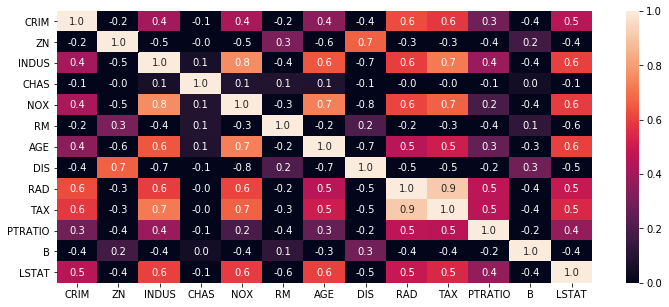

In [206]:
plt.figure(figsize=(12,5))
sns.heatmap(boston.corr(), vmin = 0, vmax = 1, annot=True,fmt='.1f');

In [0]:
# not start crash
##make cov matrix
#cov_matrix = np.cov(scaled)
# val, vec =  np.linalg.eig(cov_matrix)
# total_val = sum(val)
# ratio= [(i / total_val) for i in vec]
# print(ratio)

PCA sclearn applying SVD

Разложение по сингулярным значениям (SVD)

SVD - это процесс получения истинного числа векторов в матрице и их аппроксимации в виде линейной комбинации меньшего списка векторов. Этот новый список называется собственным разложением матрицы и содержит только те собственные векторы, которые объясняют существенные части дисперсии.

Когда наборы данных имеют большое количество переменных по сравнению с выборками, ковариационная матрица становится очень большой, и выполнение вычислений на ней будет медленным и обременительным для вашего компьютера.

SVD может быть более точным, поскольку при вычислении ковариационной матрицы теряется точность. SVD не рассчитывает эту матрицу, поэтому она будет сохранять оптимальную точность. 

In [208]:
boston.corr() < 0.7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,False,True,True,True,True,True,True,True,True,True,True,True,True
ZN,True,False,True,True,True,True,True,True,True,True,True,True,True
INDUS,True,True,False,True,False,True,True,True,True,False,True,True,True
CHAS,True,True,True,False,True,True,True,True,True,True,True,True,True
NOX,True,True,False,True,False,True,False,True,True,True,True,True,True
RM,True,True,True,True,True,False,True,True,True,True,True,True,True
AGE,True,True,True,True,False,True,False,True,True,True,True,True,True
DIS,True,True,True,True,True,True,True,False,True,True,True,True,True
RAD,True,True,True,True,True,True,True,True,False,False,True,True,True
TAX,True,True,False,True,True,True,True,True,False,False,True,True,True


Drop features > 0.7

In [0]:
for_drop = ['TAX', 'NOX']
#if dorop other not corr
boston.drop(for_drop, axis=1, inplace=True)

In [0]:
y = data.target
#becouse we drop features and  new scaled
scaled = StandardScaler().fit_transform(boston.values)

#### PCA

In [212]:
pca = PCA()
pca.fit_transform(scaled)

array([[-2.08292818,  0.6126599 ,  0.09682815, ..., -0.19007916,
         0.6014377 ,  0.00365196],
       [-0.96214616,  0.41409172, -0.62228074, ...,  0.00595958,
         0.11854107, -0.60324611],
       [-1.69131767,  0.6046188 ,  0.12466031, ...,  0.17521431,
        -0.21868648, -0.47856525],
       ...,
       [-0.08233356,  0.97266373, -0.45859333, ...,  1.0938279 ,
         0.40556079,  0.14452809],
       [-0.02887484,  0.81924814, -0.603836  , ...,  1.05133776,
         0.40850735,  0.11071548],
       [ 0.15697879,  0.39514282, -1.24620753, ...,  0.94128188,
         0.65674938,  0.20343227]])

Теперь мы хотим знать, сколько основных компонентов мы можем выбрать для нашего нового подпространства функций? 

Объясненный коэффициент дисперсии (**explained variance ratio**) говорит нам, сколько информации (дисперсии) можно отнести к каждому из основных компонентов.

In [213]:
pca.explained_variance_ratio_

array([0.43506275, 0.11958542, 0.10521326, 0.07723676, 0.07160087,
       0.05736366, 0.03966308, 0.03427538, 0.02363534, 0.0196289 ,
       0.01673459])

Check num components for .80

In [214]:
pca = PCA(0.8).fit(scaled)
pca.n_components_

5

R2 - соответствие модели данным

RMSE -Насколько в среднем похожи числа

In [0]:
def what_best(X, y, pca = False, scale = False):
  """
  Здесь мы вычислили R в квадрате, определяемую как метрику, которая количественно
  определяет величину дисперсии в целевой переменной, которая прогнозируется 
  из переменной признака и RMSE (среднеквадратичное значение).
  """  
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
  #scale
  if scale:
    s = StandardScaler().fit(X_train)
    X_train = s.transform(X_train)
    X_test = s.transform(X_test)
  #pca
  if pca:
    pca = PCA(n_components=3)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

  ##model
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)

  ##return
  r2 = lr.score(X_test, y_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred))
  print('R2 score is {}'.format(r2))
  print('RMSE is {}'.format(rmse))

In [0]:
%time
print('___')
print('All false')
what_best(boston.values, y, pca = False, scale = False)
print('___')
print('PCA')
what_best(boston.values, y, pca = True, scale = False)
print('___')
print("PCA&Scale")
what_best(boston.values, y, pca = True, scale = True)
print('___')
print('Only Scale')
what_best(boston.values, y, pca = False, scale = True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
___
All false
R2 score is 0.686650997079624
RMSE is 5.087557849555481
___
PCA
R2 score is 0.19098014663224483
RMSE is 8.174755867082972
___
PCA&Scale
R2 score is 0.5978552189466066
RMSE is 5.763501631411967
___
Only Scale
R2 score is 0.6866509970796237
RMSE is 5.087557849555484


### #

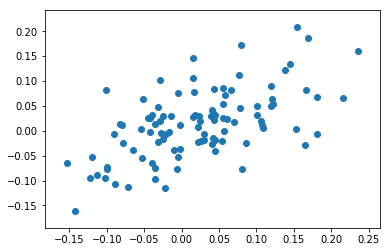

In [221]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, tail_strength=.2, effective_rank=True, random_state=1)
plt.scatter(X[:, 0], X[:, 1])

In [0]:
x1 = X[:, 0] - X[:, 0].mean()
x2 = X[:, 1] - X[:, 1].mean()
Xcentred = np.vstack((x1, x2))

In [225]:
cov = np.cov(Xcentred)
e_value,e_vector = np.linalg.eig(cov)
e_vector

array([[ 0.81208104, -0.58354468],
       [ 0.58354468,  0.81208104]])

In [226]:
variance_ratio(e_value)

[0.805492794171545, 0.19450720582845504]

#### how plot components

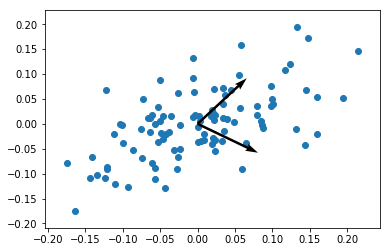

In [268]:
plt.scatter(Xcentred[0], Xcentred[1])
plt.quiver(0, 0, e_vector[:, 0], e_vector[:, 1],  scale = 5, angles = 'xy')

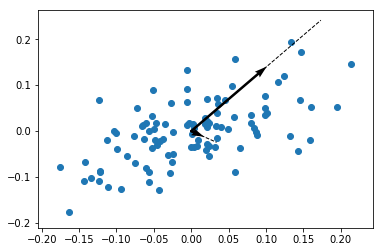

In [260]:
plt.scatter(Xcentred[0], Xcentred[1])
for l, v in zip(ratio, e_vector):
  d = 0.3* np.sqrt(l) * v
  plt.quiver(0, 0, [0, d[0]], [0, d[1]], scale = 1, angles = 'xy')
  plt.plot([0, d[0]], [0, d[1]], '--k', lw=1)
 

### How many main components are enough to leave

In [0]:
X, y = make_regression(n_samples=100, n_features=30, n_informative=30, tail_strength=.6, effective_rank=True, random_state=1)

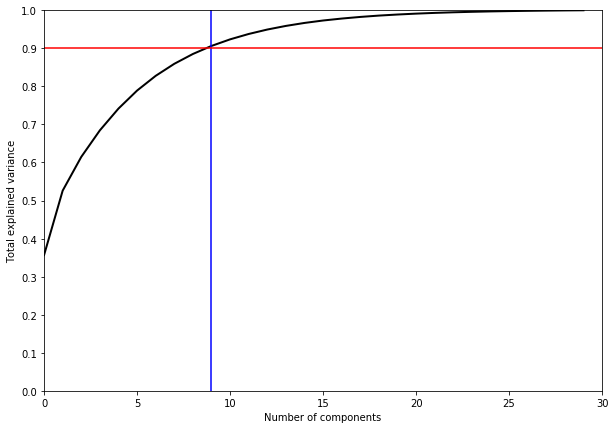

In [241]:
pca = PCA().fit(X)
plt.figure(figsize=(10,7))
#Return the cumulative sum of the elements along a given axis [1,2,3] >> 1, 1+2=3, 3+3 =6>> 1,3,6
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 30)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(9, c='b')
plt.axhline(0.9, c='r')
plt.show()